<font color=#FF0000 size='6'>**Data Preprocessing & Exploratory Data Analysis (EDA)** 

# Exploratory Data Analysis (EDA) 
--------------



Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as 
- to discover patterns, 
- to spot anomalies, 
- to test hypothesis and 
- to check assumptions 

with the help of **summary statistics** and **graphical representations**.


In reality, spending enough time on a proper EDA to fully understand your dataset is a key part of any good data science project. As a rule of thumb, you probably will spend **80%** of your time in data preparation and exploration and only  **20%** in actual machine learning modeling.




---------------
<font color=#FF0000 size='5'>**Investigation of structure, quality and content** 

Overall, the EDA approach is very iterative. At the end of your investigation you might discover something that will require you to redo everything once more. We should explore following structure for your investigations:

 1. **Structure investigation:** Exploring the general shape of the dataset, as well as the data types of your features.
<br>


 2. **Quality investigation:** Get a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
    - Involves the following aspects:
        - missing values
        - data standardization
        - data normalization
        - data binning         
 <br>

 
 3. **Content investigation:** Once the structure and quality of the dataset is understood, we can go ahead and perform a more in-depth exploration on the features values and look at how different features relate to each other.
-----------

## EDA with Pandas 
-----
pandas documentation: https://pandas.pydata.org/docs/index.html

In [1]:
import numpy as np
# import pandas using an alias
import pandas as pd # Let's import pandas with pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sobhanmoosavi/us-accidents")

print("Path to dataset files:", path)

100%|██████████| 653M/653M [05:44<00:00, 1.99MB/s] 

Extracting files...


Path to dataset files: C:\Users\basha\.cache\kagglehub\datasets\sobhanmoosavi\us-accidents\versions\13


#### Write & Read

In [3]:
fileDir = "../Data/USA_Accidents.csv"

For more info about dataset, see:
https://smoosavi.org/datasets/us_accidents

In [4]:
df = pd.read_csv(fileDir)
#usaAccidentDf

In [5]:
# type is a built-in that tells you what the type of the object is
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(1516064, 47)

**The data has about 1.5 million rows and 47 columns.  Let us see what the columns have for us to analyze**

In [7]:
# sample will randomly "sample" your dataset
usaAccidentDf=df.sample(50000)

----------
<font color='darkviolet' size='5'>1. Structure Investigation</font>
----

Before looking at the content of our **`feature matrix $X$`**, let's first look at the general structure of the dataset. For example, how many columns and rows does the dataset have?

----------

In [8]:
len(usaAccidentDf)

50000

In [9]:
len(usaAccidentDf.index)

50000

In [10]:
# getting the shape of the data: total number of rows and columns in the data set using ".shape"
usaAccidentDf.shape

(50000, 47)

In [11]:
#show the first five rows of the data 
usaAccidentDf.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
928530,A-3651843,4,2020-04-21 10:15:26,2020-04-21 11:05:24,38.91705,-76.97842,38.914060,-76.97514,0.272,Closed between US-1/Rhode Island Ave NE and Bl...,...,False,False,False,False,True,False,Day,Day,Day,Day
1384351,A-4107694,2,2017-12-08 17:58:53,2017-12-08 23:58:53,37.70110,-122.47140,37.707710,-122.46917,0.473,At CA-1/John Daly Blvd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
1219436,A-3942777,4,2018-12-10 17:31:47,2018-12-10 18:01:04,38.41371,-78.93833,38.415351,-78.93627,0.159,Closed at Dayton - Road closed due to accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [12]:
#show the last five rows of the data 
usaAccidentDf.tail(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
719775,A-3443032,2,2020-05-24 21:19:00,2020-05-24 22:10:35,34.067170,-117.428670,34.067200,-117.427610,0.061,At Cedar Ave/Exit 66 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
333057,A-3051066,2,2020-12-08 13:09:00,2020-12-09 01:38:15,28.539001,-81.314877,28.538993,-81.309278,0.340,Slow traffic from FL-408 Toll/Andes Ave (Lake ...,...,False,False,False,False,False,False,Day,Day,Day,Day
946351,A-3669670,2,2020-04-29 18:02:00,2020-04-29 18:56:44,34.506968,-117.486813,34.506968,-117.486813,0.000,At US-395 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [13]:
# show all columns: feature labels
usaAccidentDf.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

##### for quick check whether the column names are consistent or not 
- if not, we must rename them 

In [14]:
# just get the index of the dataframe
# the "row names" or "row number"
usaAccidentDf.index

Index([ 928530, 1384351, 1219436, 1448384, 1194179,  561119,  463226,   30695,
       1334844,  831589,
       ...
        880750, 1047470, 1304781, 1290926, 1215621,  705050,  447665,  719775,
        333057,  946351],
      dtype='int64', length=50000)

In [15]:
# Count how many times each data type is present in the dataset
pd.value_counts(usaAccidentDf.dtypes)

object     20
float64    13
bool       13
int64       1
Name: count, dtype: int64

In [16]:
# Check Data types which are having numerical/categorical data
usaAccidentDf.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

#### Data types can be numerical and non-numerical.

<font color='darkviolet' size='4'>1.1 Structure of non-numerical features</font>
---
First, let's take a closer look at the non-numerical entries.

--------

In [17]:
# Display non-numerical features
usaAccidentDf.select_dtypes(exclude="number").head(3)

,ID,Start_Time,End_Time,Description,Street,Side,City,County,State,Zipcode,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
928530,A-3651843,2020-04-21 10:15:26,2020-04-21 11:05:24,Closed between US-1/Rhode Island Ave NE and Bl...,West Virginia Ave NE,L,Washington,District of Columbia,DC,20002-1834,...,False,False,False,False,True,False,Day,Day,Day,Day
1384351,A-4107694,2017-12-08 17:58:53,2017-12-08 23:58:53,At CA-1/John Daly Blvd - Accident.,CA-1,R,Daly City,San Mateo,CA,94014,...,False,False,False,False,False,False,Night,Night,Night,Day
1219436,A-3942777,2018-12-10 17:31:47,2018-12-10 18:01:04,Closed at Dayton - Road closed due to accident.,John Wayland Hwy,L,Dayton,Rockingham,VA,22821,...,False,False,False,False,False,False,Night,Night,Day,Day


In [18]:
usaAccidentDf.Sunrise_Sunset.nunique()

2

In [19]:
usaAccidentDf.Sunrise_Sunset.unique()

array(['Day', 'Night', nan], dtype=object)

In [20]:
usaAccidentDf.Station.unique()

array([False,  True])

In [21]:
# Changes data type of 'Station'
usaAccidentDf["Station"] = usaAccidentDf["Station"].astype("int8")

In [22]:
usaAccidentDf.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
928530,A-3651843,4,2020-04-21 10:15:26,2020-04-21 11:05:24,38.91705,-76.97842,38.914060,-76.97514,0.272,Closed between US-1/Rhode Island Ave NE and Bl...,...,False,0,False,False,True,False,Day,Day,Day,Day
1384351,A-4107694,2,2017-12-08 17:58:53,2017-12-08 23:58:53,37.70110,-122.47140,37.707710,-122.46917,0.473,At CA-1/John Daly Blvd - Accident.,...,False,0,False,False,False,False,Night,Night,Night,Day
1219436,A-3942777,4,2018-12-10 17:31:47,2018-12-10 18:01:04,38.41371,-78.93833,38.415351,-78.93627,0.159,Closed at Dayton - Road closed due to accident.,...,False,0,False,False,False,False,Night,Night,Day,Day


In [23]:
# we need an overview of the data types for each column
usaAccidentDf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 928530 to 946351
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     50000 non-null  object 
 1   Severity               50000 non-null  int64  
 2   Start_Time             50000 non-null  object 
 3   End_Time               50000 non-null  object 
 4   Start_Lat              50000 non-null  float64
 5   Start_Lng              50000 non-null  float64
 6   End_Lat                50000 non-null  float64
 7   End_Lng                50000 non-null  float64
 8   Distance(mi)           50000 non-null  float64
 9   Description            50000 non-null  object 
 10  Number                 15489 non-null  float64
 11  Street                 50000 non-null  object 
 12  Side                   50000 non-null  object 
 13  City                   49999 non-null  object 
 14  County                 50000 non-null  object 
 15  S

In [24]:
# the body of the dataframe as a numpy array: X fearure matrix
usaAccidentDf.values

array([['A-3651843', 4, '2020-04-21 10:15:26', ..., 'Day', 'Day', 'Day'],
       ['A-4107694', 2, '2017-12-08 17:58:53', ..., 'Night', 'Night',
        'Day'],
       ['A-3942777', 4, '2018-12-10 17:31:47', ..., 'Night', 'Day',
        'Day'],
       ...,
       ['A-3443032', 2, '2020-05-24 21:19:00', ..., 'Night', 'Night',
        'Day'],
       ['A-3051066', 2, '2020-12-08 13:09:00', ..., 'Day', 'Day', 'Day'],
       ['A-3669670', 2, '2020-04-29 18:02:00', ..., 'Day', 'Day', 'Day']],
      dtype=object)

#### Summary statistics of the columns
----------
- The `describe()` function in pandas is very handy in getting various summary statistics.
- Can invetiage how many unique values each non-numerical feature has and with which frequency the most prominent value is present.
- This function returns the **`five-number summary`** is a set of descriptive statistics **(count, mean, standard deviation, minimum and maximum values and the quantiles of the data)**

##### The data has 15 numeric columns while the rest are categorical variables

In [25]:
usaAccidentDf.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,50000.0,2.235780,0.606791,1.000000,2.000000,2.000000,2.000000,4.00000
Start_Lat,50000.0,36.915130,5.177399,24.624298,33.855262,37.354989,40.734933,49.00026
Start_Lng,50000.0,-98.465202,18.510256,-124.497420,-118.207125,-93.825946,-80.852636,-68.56643
End_Lat,50000.0,36.915300,5.177453,24.603238,33.854815,37.354804,40.736012,49.00214
End_Lng,50000.0,-98.465044,18.510120,-124.497419,-118.207381,-93.828797,-80.852102,-68.56642
Distance(mi),50000.0,0.595722,1.658815,0.000000,0.000000,0.183000,0.594250,112.04700
Number,15489.0,9004.604494,17251.466185,1.000000,1260.000000,4020.000000,10329.000000,611963.00000
Temperature(F),48597.0,59.534749,18.302326,-26.000000,47.000000,61.000000,73.000000,113.00000
Wind_Chill(F),35285.0,55.087476,21.240363,-53.500000,40.700000,57.000000,71.000000,111.00000
Humidity(%),48513.0,64.895636,23.196896,2.000000,48.000000,68.000000,84.000000,100.00000


##### For object data (e.g. strings or timestamps), the result’s index will include `count`, `unique`, `top`, and `freq`:

- `top`: the most common value.
- `freq`: the most common value’s frequency.
- Timestamps also include the first and last items.
- I
If multiple object values have the highest count, then the `count` an `top` results will be arbitrarily chosen from among those with the highest count.

In [26]:
usaAccidentDf.describe(exclude="number").T.head(6)

,count,unique,top,freq
ID,50000,50000,A-3651843,1
Start_Time,50000,48961,2020-12-17 13:11:00,4
End_Time,50000,49357,2019-10-17 18:07:45,4
Description,50000,38279,A crash has occurred causing no to minimum del...,93
Street,50000,14583,I-5 N,896
Side,50000,2,R,42741


In [27]:
np.sum(usaAccidentDf.Street == "I-5 N")

896

<font color='darkviolet' size='4'>1.2 Structure of numerical features</font>
---

Next, let's take a closer look at the numerical features. More precisely, let's investigate how many unique values each of these feature has. This process will give us some insights about the number of: 
- **binary** (2 unique values),
- **ordinal** (2 to ~10 unique values) and
- **continuous** (more than 10 unique values) features in the dataset.

-------

In [28]:
# For each numerical feature compute number of unique entries
uniqueVal = usaAccidentDf.select_dtypes(include="number").nunique().sort_values()
print(uniqueVal)

Station                  2
Severity                 4
Visibility(mi)          47
Wind_Speed(mph)         68
Precipitation(in)       87
Humidity(%)             99
Temperature(F)         548
Wind_Chill(F)          583
Pressure(in)           765
Distance(mi)          4128
Number                8127
End_Lat              43977
Start_Lat            44058
End_Lng              44090
Start_Lng            44250
dtype: int64


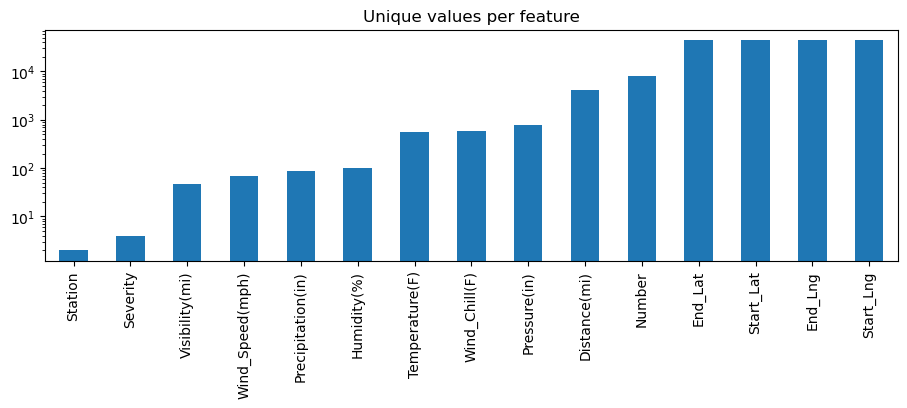

In [29]:
# Plot information with y-axis in log-scale
uniqueVal.plot.bar(logy=True, figsize=(11, 3), title="Unique values per feature");

<font color='darkviolet' size='4'>1.3 Conclusion of structure investigation</font>
---

At the end of this first investigation, we should have a better understanding of the general structure of our dataset: 
- Number of samples and features, 
- What kind of data type each feature has, 
- How many of them are binary, ordinal, categorical or continuous. 

------

---------
<font color='darkviolet' size='5'>2. Quality Investigation</font>
-----

Before focusing on the actual content stored in these features, let's first take a look at the general quality of the dataset. The goal is to have a global view on the dataset with regards to things like duplicates, missing values and unwanted entries or recording errors.

------

<font color='darkviolet' size='4'>2.1. Duplicates</font>
---

Duplicates are entries that represent the same sample point multiple times. For example, if a measurement was registered twice by two different people. Detecting such duplicates is not always easy, as each dataset might have a unique identifier (e.g. an index number or recording time that is unique to each new sample) which you might want to ignore first.

-----

In [30]:
usaAccidentDf.duplicated()

928530     False
1384351    False
1219436    False
1448384    False
1194179    False
           ...  
705050     False
447665     False
719775     False
333057     False
946351     False
Length: 50000, dtype: bool

In [31]:
# Check number of duplicates while ignoring the index feature

nDuplicates = usaAccidentDf.drop(labels=["ID"], axis=1).duplicated().sum()
print(f"You seem to have {nDuplicates} duplicates in your database.")

You seem to have 131 duplicates in your database.


<font color='darkviolet' size='4'>2.2. Missing values</font>
----
Another quality issue worth to investigate are missing values. Having some missing values is normal. What we want to identify at this stage are big holes in the dataset, i.e. samples or features with a lot of missing values.
- ##### Look for missing values. 
    - Missing values under different columns can add an unwanted skewness to their distribution, making it complicated to analyze

-----

- ##### When dealing with missing values, different alternatives can be applied:
    - check the source, for example by contacting the data source to correct the missing values
    - drop missing values
    - replace the missing value with a value
    - leave the missing value

##### Operating on Null Values

As we have seen, Pandas treats ``None`` and ``NaN`` as essentially interchangeable for indicating missing or null values.
To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures.
They are:

- ``isnull()``: Generate a boolean mask indicating missing values
- ``notnull()``: Opposite of ``isnull()``
- ``dropna()``: Return a filtered version of the data
- ``fillna()``: Return a copy of the data with missing values filled or imputed

We will conclude this section with a brief exploration and demonstration of these routines.

<font color='darkviolet' size='3'>2.2.1 Per Sample</font>
---
To look at number of missing values per sample we have multiple options. The most straight forward one is to simply visualize the output of `usaAccidentDf.isna()`, with something like this:


In [32]:
usaAccidentDf.isna().sample(5)
#pd.isna(usaAccidentDf)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
196231,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
678693,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1330128,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
519786,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
514119,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


- The function **`isna()`**, which returns if an cell of the dataset if NaN or not. Then we can count how many missing values there are for each column.

In [33]:
usaAccidentDf.isnull().sample(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
260888,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
594106,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1246855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1387794,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
535770,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
usaAccidentDf.notna().sample(5)
#usaAccidentDf.notnull().sample(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
124796,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
434204,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1283425,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
672280,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
434434,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


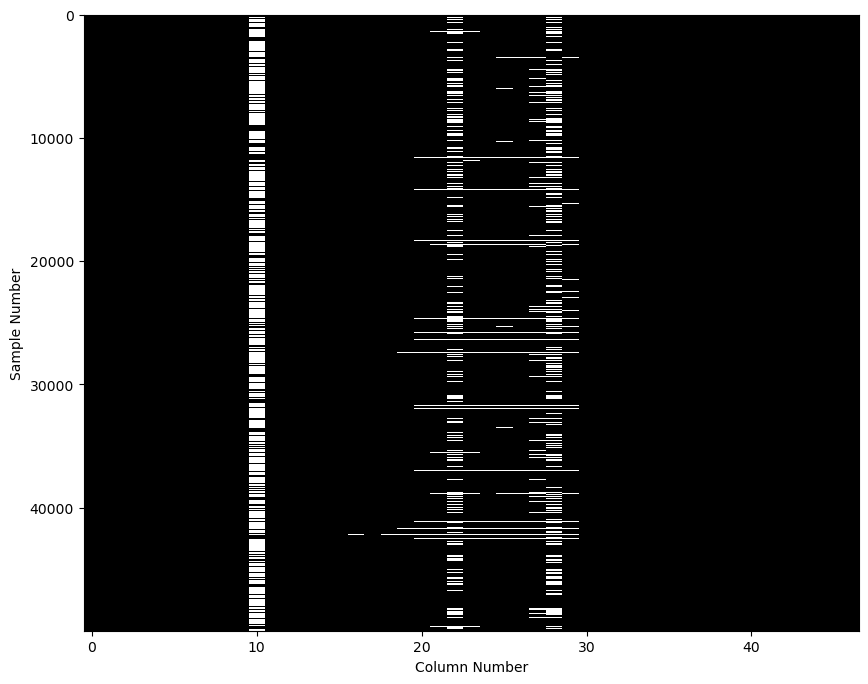

In [35]:
# imshow(.): display data as an image, i.e., on a 2D regular raster.
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.imshow(usaAccidentDf.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

##### Drop missing values:  Filtering out missing data
-----

Dropping missing values can be one of the following alternatives and We can use the `dropna()` by specifying the axis to be considered. 

- remove rows having missing values
    - If we set `axis = 0` we drop the entire row,
- remove the whole column containing missing values.
    - if we set `axis = 1` we drop the whole column. 


In [36]:
# axis = 0 we drop the whole row
usaAccidentDf.dropna(axis=0, how='all').shape

(50000, 47)

In [37]:
# we drop the whole row, which have at least one missing value
usaAccidentDf.dropna(axis=0).shape

(11090, 47)

In [38]:
# axis = 1 we drop the whole column
usaAccidentDf.dropna(axis=1).shape

(50000, 28)

 - **inplace = True**  
     -the data is modified in place, which means it will return nothing and the dataframe is now updated.

In [39]:
#usaAccidentDf.dropna(axis=1, inplace=True)

From this plot, we can see that the dataset has a huge whole, caused by some samples where more than 50% of the feature values are missing. For those samples, filling the missing values with some replacement values is probably not a good idea.

Therefore, let's go ahead and drop samples that have more than 20% of missing values. The threshold is inspired by the information from the 'Data Completeness' column on the right of this figure.

<font color='darkviolet' size='3'>2.2.2 Per Feature</font>
---

**As a next step, let's now look at the number of missing values per feature. For this we can use some pandas trickery to quickly identify the ratio of missing values per feature.**

In [40]:
# Get the total number of NaN values
usaAccidentDf.isna().sum()

ID                           0
Severity                     0
Start_Time                   0
End_Time                     0
Start_Lat                    0
Start_Lng                    0
End_Lat                      0
End_Lng                      0
Distance(mi)                 0
Description                  0
Number                   34511
Street                       0
Side                         0
City                         1
County                       0
State                        0
Zipcode                     26
Country                      0
Timezone                    77
Airport_Code               147
Weather_Timestamp          999
Temperature(F)            1403
Wind_Chill(F)            14715
Humidity(%)               1487
Pressure(in)              1190
Visibility(mi)            1456
Wind_Direction            1357
Wind_Speed(mph)           4261
Precipitation(in)        16649
Weather_Condition         1439
Amenity                      0
Bump                         0
Crossing

In [41]:
# Let's sort the sum of NaN values
usaAccidentDf.isna().sum().sort_values(ascending=False)[:15]

Number               34511
Precipitation(in)    16649
Wind_Chill(F)        14715
Wind_Speed(mph)       4261
Humidity(%)           1487
Visibility(mi)        1456
Weather_Condition     1439
Temperature(F)        1403
Wind_Direction        1357
Pressure(in)          1190
Weather_Timestamp      999
Airport_Code           147
Timezone                77
Zipcode                 26
Sunrise_Sunset           1
dtype: int64

In [42]:
usaAccidentDf['Number']
#usaAccidentDf['Precipitation(in)']

928530     2296.0
1384351       NaN
1219436    3292.0
1448384      47.0
1194179       NaN
            ...  
705050        NaN
447665        NaN
719775        NaN
333057     5470.0
946351     8073.0
Name: Number, Length: 50000, dtype: float64

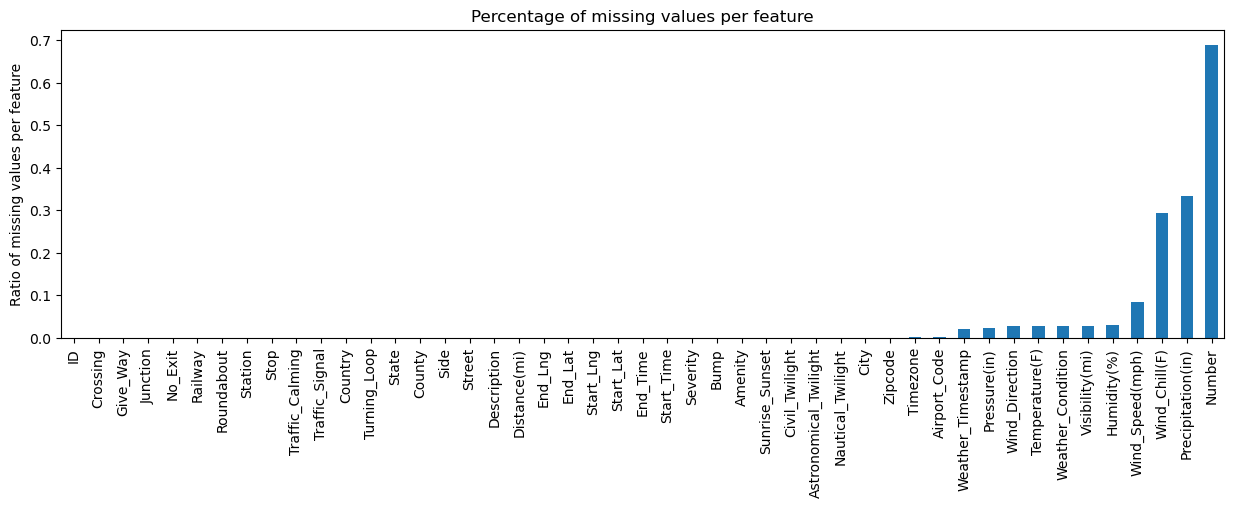

In [43]:
usaAccidentDf.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

##### Q: What is the percentage share of missing values for each column in the entire data? `More meanninfull!!!`

In [44]:
missingPercentages = usaAccidentDf.isna().sum().sort_values(
    ascending = False)/len(usaAccidentDf)*100

# Filter: sort out the ones with zeroes
missingPercentages[missingPercentages != 0]

Number                   69.022
Precipitation(in)        33.298
Wind_Chill(F)            29.430
Wind_Speed(mph)           8.522
Humidity(%)               2.974
Visibility(mi)            2.912
Weather_Condition         2.878
Temperature(F)            2.806
Wind_Direction            2.714
Pressure(in)              2.380
Weather_Timestamp         1.998
Airport_Code              0.294
Timezone                  0.154
Zipcode                   0.052
Sunrise_Sunset            0.002
Civil_Twilight            0.002
Nautical_Twilight         0.002
Astronomical_Twilight     0.002
City                      0.002
dtype: float64

The columns `Number`, `Precipitation(in)` and `Wind_Chill(F)` have the most missing values:
- `Number`: ~69%
- `Precipitation(in)`: ~34%
- `Wind_Chill(F)`: ~30%

#### Note!
There is no strict order in removing missing values. For some datasets, tackling first the features and than the samples might be better. Furthermore, the threshold at which you decide to drop missing values per feature or sample changes from dataset to dataset, and depends on what you intend to do with the dataset later on.


#### What should we do?
- It is wise to either remove the columns altogether or exclude them from the ensuing analysis.
Let us now see what the above numbers would look like visually. Plotting a horizontal bar chart as

<Axes: >

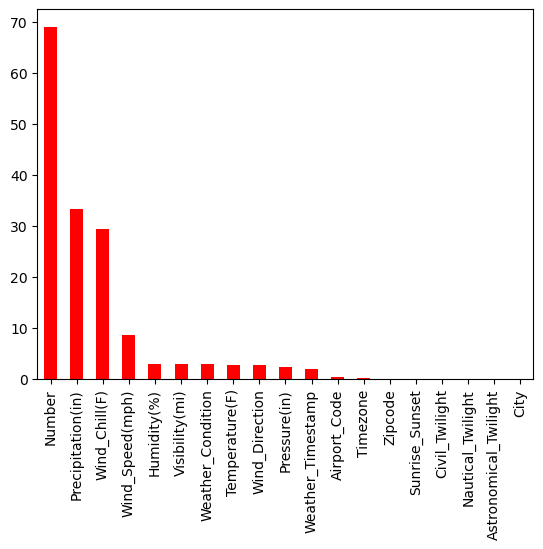

In [45]:
missingPercentages[missingPercentages != 0].plot(kind='bar', color='red')

We also can specify only the column on which the dropping operation must be applied. 


In [46]:
usaAccidentDf = usaAccidentDf.drop("Description", axis=1)

In [47]:
usaAccidentDf.isna().sum().sort_values(ascending=False)[:15]

Number               34511
Precipitation(in)    16649
Wind_Chill(F)        14715
Wind_Speed(mph)       4261
Humidity(%)           1487
Visibility(mi)        1456
Weather_Condition     1439
Temperature(F)        1403
Wind_Direction        1357
Pressure(in)          1190
Weather_Timestamp      999
Airport_Code           147
Timezone                77
Zipcode                 26
Sunrise_Sunset           1
dtype: int64

In the following example, only missing rows related to the column `Number` are considered. This can be achieved through the subset parameter, which permits to specify the subset of columns where to apply the dropping operation.

In [48]:
usaAccidentDf.Number.isna().sum()

34511

In [49]:
#usaAccidentDf.dropna(subset=['Number'],axis=0,inplace=True)
dropedDf = usaAccidentDf.dropna(subset=['Number'], axis=0)
dropedDf.Number.isna().sum()

0

In [50]:
#usaAccidentDf.isna().sum()/len(df)*100
dropedDf.isna().sum().sort_values(
    ascending = False)/len(dropedDf)

Precipitation(in)        0.251404
Wind_Chill(F)            0.214346
Wind_Speed(mph)          0.073923
Visibility(mi)           0.031894
Humidity(%)              0.031700
Weather_Condition        0.031571
Wind_Direction           0.030538
Temperature(F)           0.029828
Pressure(in)             0.025567
Weather_Timestamp        0.022209
Airport_Code             0.003099
Timezone                 0.002324
Nautical_Twilight        0.000000
Civil_Twilight           0.000000
Sunrise_Sunset           0.000000
Amenity                  0.000000
Turning_Loop             0.000000
Traffic_Signal           0.000000
Traffic_Calming          0.000000
Station                  0.000000
Roundabout               0.000000
Bump                     0.000000
Crossing                 0.000000
Stop                     0.000000
Junction                 0.000000
No_Exit                  0.000000
Railway                  0.000000
Give_Way                 0.000000
ID                       0.000000
Severity      

---------------
- Another alternative involves the dropping of columns where a certain percentage of **not-null values** is available. 
- This can be achieved through the **`thresh`** parameter. In the following example we keep only:
    - rows where there are at least the 80% of not null values
    - columns where there are at least the 65% of not null values
------

In [51]:
usaAccidentDf = usaAccidentDf.dropna(thresh=usaAccidentDf.shape[1] * 0.80, axis=0).reset_index(drop=True)
usaAccidentDf.shape

(49001, 46)

In [52]:
#usaAccidentDf.dropna(thresh=0.65*len(usaAccidentDf),axis=1,inplace=True)
usaAccidentDf.dropna(thresh=0.65*len(usaAccidentDf), axis=1)
usaAccidentDf.shape

(49001, 46)

<font color='darkviolet' size='4'>2.3 Data Imputation</font>
---

A good strategy when dealing with missing values involves their replacement with another value. Usually, the following strategies are adopted:

- for numerical values replace the missing value with the average value of the column
- for categorial values replace the missing value with the most frequent value of the column
- use other functions

-----
In order to replace missing values, three functions can be used:

 - `fillna()`, `replace()` and `interpolate()`: 
----- 

The `fillna()` function replaces all the NaN values with the value passed as argument. 

For example, for numerical values, all the NaN values in the numeric columns could be replaced with the average value. 

---------

##### Numeric columns

- Firstly, we select numeric columns.

In [53]:
sampleUsaAccident=df.sample(10000)

In [54]:
print(usaAccidentDf.count(numeric_only=True))
print("Total No. of Numerical Columns:", len(usaAccidentDf.count(numeric_only=True)))

Severity             49001
Start_Lat            49001
Start_Lng            49001
End_Lat              49001
End_Lng              49001
Distance(mi)         49001
Number               15145
Temperature(F)       48597
Wind_Chill(F)        35285
Humidity(%)          48513
Pressure(in)         48810
Visibility(mi)       48544
Wind_Speed(mph)      45739
Precipitation(in)    33351
Amenity              49001
Bump                 49001
Crossing             49001
Give_Way             49001
Junction             49001
No_Exit              49001
Railway              49001
Roundabout           49001
Station              49001
Stop                 49001
Traffic_Calming      49001
Traffic_Signal       49001
Turning_Loop         49001
dtype: int64
Total No. of Numerical Columns: 27


In [55]:
# Extract numeric columns 
numericNum = sampleUsaAccident.select_dtypes(include = np.number)
numericNum

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
531441,2,25.626002,-80.382204,25.627293,-80.383446,0.118,15380.0,85.0,85.0,74.0,29.96,10.0,15.0,0.0
91484,3,34.119150,-84.077300,34.118760,-84.076960,0.033,5930.0,80.6,NaN,70.0,30.16,10.0,6.9,NaN
944904,2,35.206910,-80.796360,35.206910,-80.796360,0.000,NaN,77.0,77.0,42.0,29.06,10.0,24.0,0.0
648944,2,32.900737,-117.220205,32.911097,-117.227995,0.847,NaN,58.0,58.0,53.0,29.67,10.0,9.0,0.0
1505485,2,35.539990,-82.788259,35.540389,-82.792827,0.258,NaN,79.0,79.0,58.0,27.85,10.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296542,2,34.029910,-117.711580,34.030030,-117.708473,0.178,NaN,100.9,NaN,18.0,29.94,10.0,13.8,NaN
420906,2,40.018354,-76.769958,40.020635,-76.767572,0.202,2999.0,40.0,40.0,68.0,29.84,10.0,3.0,0.0
88159,2,42.904480,-78.766770,42.914310,-78.766340,0.680,NaN,72.0,NaN,61.0,29.93,10.0,17.3,NaN
1436527,2,42.703221,-71.450530,42.711300,-71.450131,0.559,NaN,80.1,NaN,47.0,30.02,10.0,13.8,NaN


In [56]:
# Get all indexes of numeric columns 
numericColumns = numericNum.columns
numericColumns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

- Then, fill the NaN values of numeric columns with the average value, given by the df.mean() function.

In [57]:
sampleUsaAccident['Number'] = sampleUsaAccident['Number'].fillna(sampleUsaAccident['Number'].mean())

In [58]:
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Precipitation(in)    0.3370
Wind_Chill(F)        0.2947
Wind_Speed(mph)      0.0848
Humidity(%)          0.0308
Wind_Direction       0.0284
Visibility(mi)       0.0284
Temperature(F)       0.0284
Weather_Condition    0.0284
Pressure(in)         0.0229
Weather_Timestamp    0.0203
Airport_Code         0.0048
Timezone             0.0023
Zipcode              0.0015
dtype: float64

In [59]:
sampleUsaAccident[numericColumns] = sampleUsaAccident[numericColumns].fillna(sampleUsaAccident[numericColumns].mean())

In [60]:
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Weather_Condition    0.0284
Wind_Direction       0.0284
Weather_Timestamp    0.0203
Airport_Code         0.0048
Timezone             0.0023
Zipcode              0.0015
dtype: float64

#### Interpolation

Another solution to replace missing values involves the usage of other functions, such as linear interpolation. 
In this case, for example, could be replaced a missing value over a column, with the interpolation between the previous and the next ones. This can be achieved through the use of the `interpolate()` function.
Since we have already managed all the missing values, we reload the dataset.

In [61]:
sampleUsaAccident=usaAccidentDf.sample(1000)
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Number               0.720
Precipitation(in)    0.322
Wind_Chill(F)        0.290
Wind_Speed(mph)      0.076
Humidity(%)          0.017
Temperature(F)       0.012
Visibility(mi)       0.011
Wind_Direction       0.010
Weather_Condition    0.010
Pressure(in)         0.003
dtype: float64

In [62]:
# Extract numeric columns 
numericNum = sampleUsaAccident.select_dtypes(include = np.number)
numericColumns = numericNum.columns
numericColumns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Number', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Station'],
      dtype='object')

Can be applied the `interpolate()` function to numeric columns, by setting also the limit direction to forward. This means that the linear interpolation is applied starting from the first row until the last one.

In [63]:
sampleUsaAccident[numericColumns] = sampleUsaAccident[numericColumns].interpolate(method ='linear', limit_direction ='forward')

In [64]:
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Wind_Direction       0.010
Weather_Condition    0.010
Number               0.007
dtype: float64

In [65]:
sampleUsaAccident=usaAccidentDf.sample(1000)
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Number                   0.705
Precipitation(in)        0.298
Wind_Chill(F)            0.272
Wind_Speed(mph)          0.072
Visibility(mi)           0.014
Humidity(%)              0.014
Temperature(F)           0.013
Wind_Direction           0.013
Weather_Condition        0.012
Pressure(in)             0.007
Nautical_Twilight        0.001
Civil_Twilight           0.001
Sunrise_Sunset           0.001
Astronomical_Twilight    0.001
City                     0.001
dtype: float64

In [66]:
missPercent = sampleUsaAccident.isna().sum().sort_values(
    ascending = False)/len(sampleUsaAccident)
missPercent[missPercent != 0]

Number                   0.705
Precipitation(in)        0.298
Wind_Chill(F)            0.272
Wind_Speed(mph)          0.072
Visibility(mi)           0.014
Humidity(%)              0.014
Temperature(F)           0.013
Wind_Direction           0.013
Weather_Condition        0.012
Pressure(in)             0.007
Nautical_Twilight        0.001
Civil_Twilight           0.001
Sunrise_Sunset           0.001
Astronomical_Twilight    0.001
City                     0.001
dtype: float64

In [67]:
# Unique number of observations for each feature:
# Count number of distinct elements in specified axis.
# Return Series with number of distinct elements. Can ignore NaN values.
usaAccidentDf.nunique()

ID                       49001
Severity                     4
Start_Time               47994
End_Time                 48380
Start_Lat                43190
Start_Lng                43380
End_Lat                  43106
End_Lng                  43210
Distance(mi)              4089
Number                    7990
Street                   14354
Side                         2
City                      4840
County                    1117
State                       49
Zipcode                  17432
Country                      1
Timezone                     4
Airport_Code              1471
Weather_Timestamp        37348
Temperature(F)             548
Wind_Chill(F)              583
Humidity(%)                 99
Pressure(in)               765
Visibility(mi)              47
Wind_Direction              24
Wind_Speed(mph)             68
Precipitation(in)           87
Weather_Condition           76
Amenity                      2
Bump                         2
Crossing                     2
Give_Way

In [68]:
# Lets check the no. of unique items present in the categorical column
usaAccidentDf.select_dtypes('object').nunique()

ID                       49001
Start_Time               47994
End_Time                 48380
Street                   14354
Side                         2
City                      4840
County                    1117
State                       49
Zipcode                  17432
Country                      1
Timezone                     4
Airport_Code              1471
Weather_Timestamp        37348
Wind_Direction              24
Weather_Condition           76
Sunrise_Sunset               2
Civil_Twilight               2
Nautical_Twilight            2
Astronomical_Twilight        2
dtype: int64

<font color='darkviolet' size='4'>2.4 renamed inconsistent columns name</font>
---

-----------

In [69]:
usaAccidentDf.rename(columns={'Start_Time':'Start Time'}, inplace=True)
usaAccidentDf.head(2)

,ID,Severity,Start Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3651843,4,2020-04-21 10:15:26,2020-04-21 11:05:24,38.91705,-76.97842,38.91406,-76.97514,0.272,2296.0,...,False,0,False,False,True,False,Day,Day,Day,Day
1,A-4107694,2,2017-12-08 17:58:53,2017-12-08 23:58:53,37.70110,-122.47140,37.70771,-122.46917,0.473,NaN,...,False,0,False,False,False,False,Night,Night,Night,Day


In [70]:
usaAccidentDf['Start Time']

0        2020-04-21 10:15:26
1        2017-12-08 17:58:53
2        2018-12-10 17:31:47
3        2019-04-16 12:58:00
4        2019-02-26 11:31:02
                ...         
48996    2020-11-11 02:03:02
48997    2020-12-16 23:05:00
48998    2020-05-24 21:19:00
48999    2020-12-08 13:09:00
49000    2020-04-29 18:02:00
Name: Start Time, Length: 49001, dtype: object

In [71]:
usaAccidentDf.Severity

0        4
1        2
2        4
3        2
4        2
        ..
48996    2
48997    2
48998    2
48999    2
49000    2
Name: Severity, Length: 49001, dtype: int64

In [72]:
usaAccidentDf.Start_Time

SyntaxError: invalid syntax (3444967511.py, line 1)

In [73]:
usaAccidentDf.rename(columns={'Start Time':'Start_Time'}, inplace=True)
usaAccidentDf.Start_Time

0        2020-04-21 10:15:26
1        2017-12-08 17:58:53
2        2018-12-10 17:31:47
3        2019-04-16 12:58:00
4        2019-02-26 11:31:02
                ...         
48996    2020-11-11 02:03:02
48997    2020-12-16 23:05:00
48998    2020-05-24 21:19:00
48999    2020-12-08 13:09:00
49000    2020-04-29 18:02:00
Name: Start_Time, Length: 49001, dtype: object

<font color='darkviolet' size='4'>2.5 Unwanted entries and recording errors</font>
---

Another source of quality issues in a dataset can be due to unwanted entries or recording errors. It's important to distinguish such samples from simple outliers. While outliers are data points that are unusual for a given feature distribution, unwanted entries or recording errors are samples that shouldn't be there in the first place.

For example, a temperature recording of 45°C in Switzerland might be an outlier (as in 'very unusual'), while a recording at 90°C would be an error. Similarly, a temperature recording from the top of Mont Blanc might be physical possible, but most likely shouldn't be included in a dataset about Swiss cities.

Of course, detecting such errors and unwanted entries and distinguishing them from outliers is not always straight forward and depends highly on the dataset. One approach to this is to take a global view on the dataset and see if you can identify some very unusual patterns.

-------------

<font color='darkviolet' size='3'>2.5.1 Numerical features</font>
---

To plot this global view of the dataset, at least for the numerical features, you can use pandas' .plot() function and combine it with the following parameters:

- `lw=0: lw` stands for line width. 0 means that we don't want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use . as markers for each data point
- `subplots=True`: subplots tells pandas to plot each feature in a separate subplot
- `layout=(-1, 3)`: This parameter tells pandas how many rows and columns to use for the subplots. The -1 means "as many as needed", while the 2 means to use 2 columns per row.
- `figsize=(10, 20)`,  `markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.

So what does this plot look like?

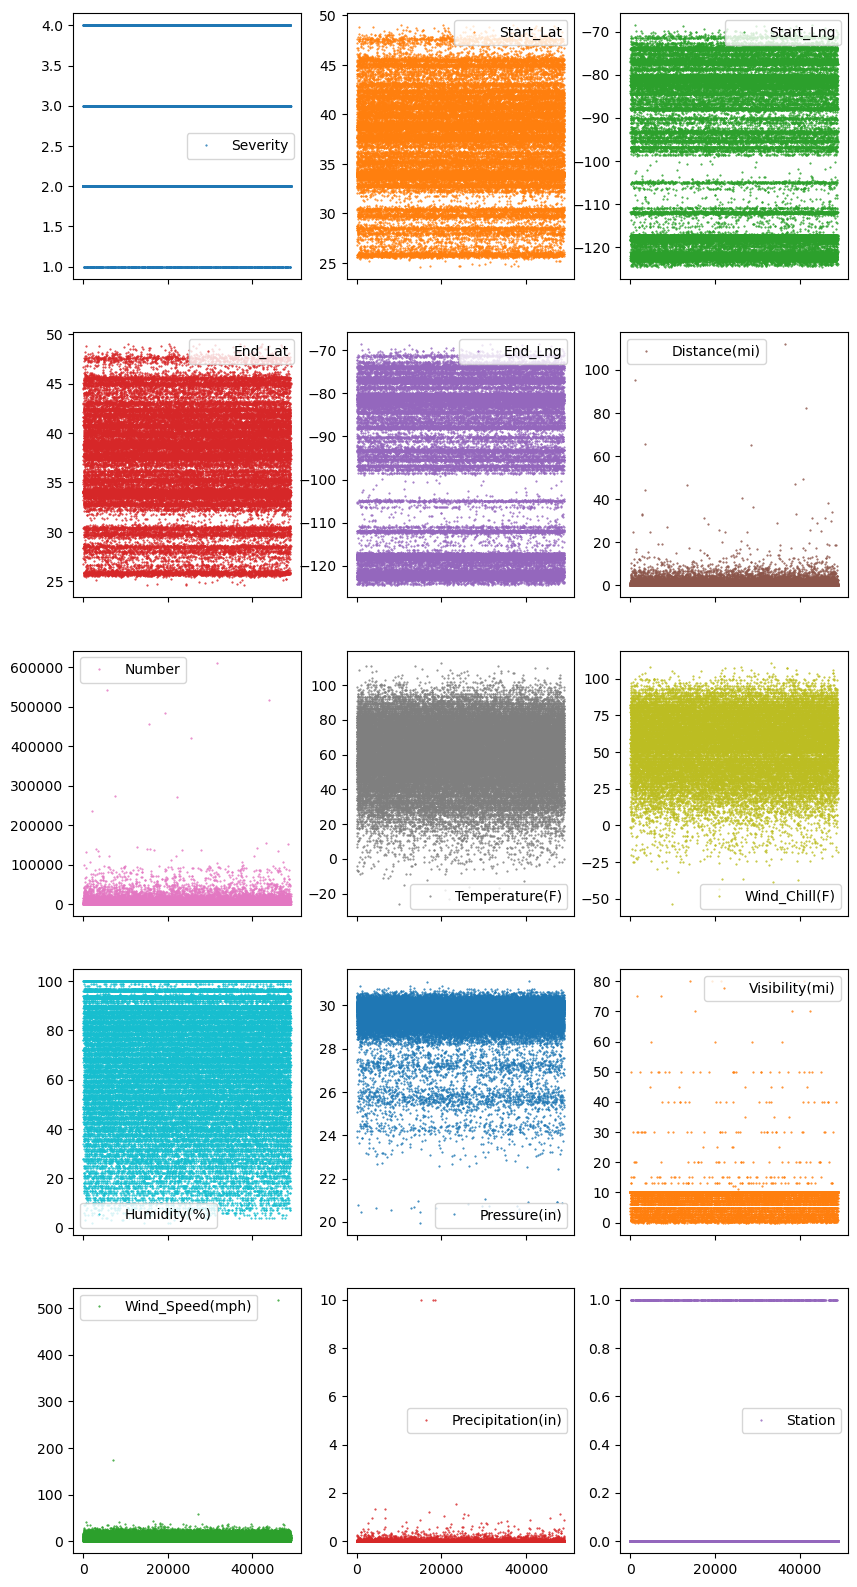

In [74]:
usaAccidentDf.plot(lw=0, marker=".", subplots=True, layout=(-1, 3),
          figsize=(10, 20), markersize=1);

Each point in this figure is a sample (i.e. a row) in our dataset and each subplot represents a different feature. The y-axis shows the feature value, while the x-axis is the sample index. These kind of plots can give you a lot of ideas for data cleaning and EDA. Usually it makes sense to invest as much time as needed until your happy with the output of this visualization.

<font color='darkviolet' size='3'>2.5.2 Non-numerical features</font>
---

Identifying unwanted entries or recording errors on non-numerical features is a bit more tricky. Given that at this point, we only want to investigate the general quality of the dataset. So what we can do is take a general look at how many unique values each of these non-numerical features contain, and how often their most frequent category is represented.

In [75]:
# Extract descriptive properties of non-numerical features
usaAccidentDf.describe(exclude=["number", "datetime"])

,ID,Start_Time,End_Time,Street,Side,City,County,State,Zipcode,Country,...,Railway,Roundabout,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,49001,49001,49001,49001,49001,49000,49001,49001,49001,49001,...,49001,49001,49001,49001,49001,49001,49000,49000,49000,49000
unique,49001,47994,48380,14354,2,4840,1117,49,17432,1,...,2,2,2,2,2,1,2,2,2,2
top,A-3651843,2020-12-21 15:03:30,2019-10-17 18:07:45,I-5 N,R,Los Angeles,Los Angeles,CA,91761,US,...,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,4,4,892,41918,1293,4350,14376,113,49001,...,48604,48997,48442,48989,43500,49001,29466,31364,33435,35227


In [76]:
usaAccidentDf = usaAccidentDf.drop("ID", axis=1)


In [77]:
usaAccidentDf = usaAccidentDf.drop("Side", axis=1)

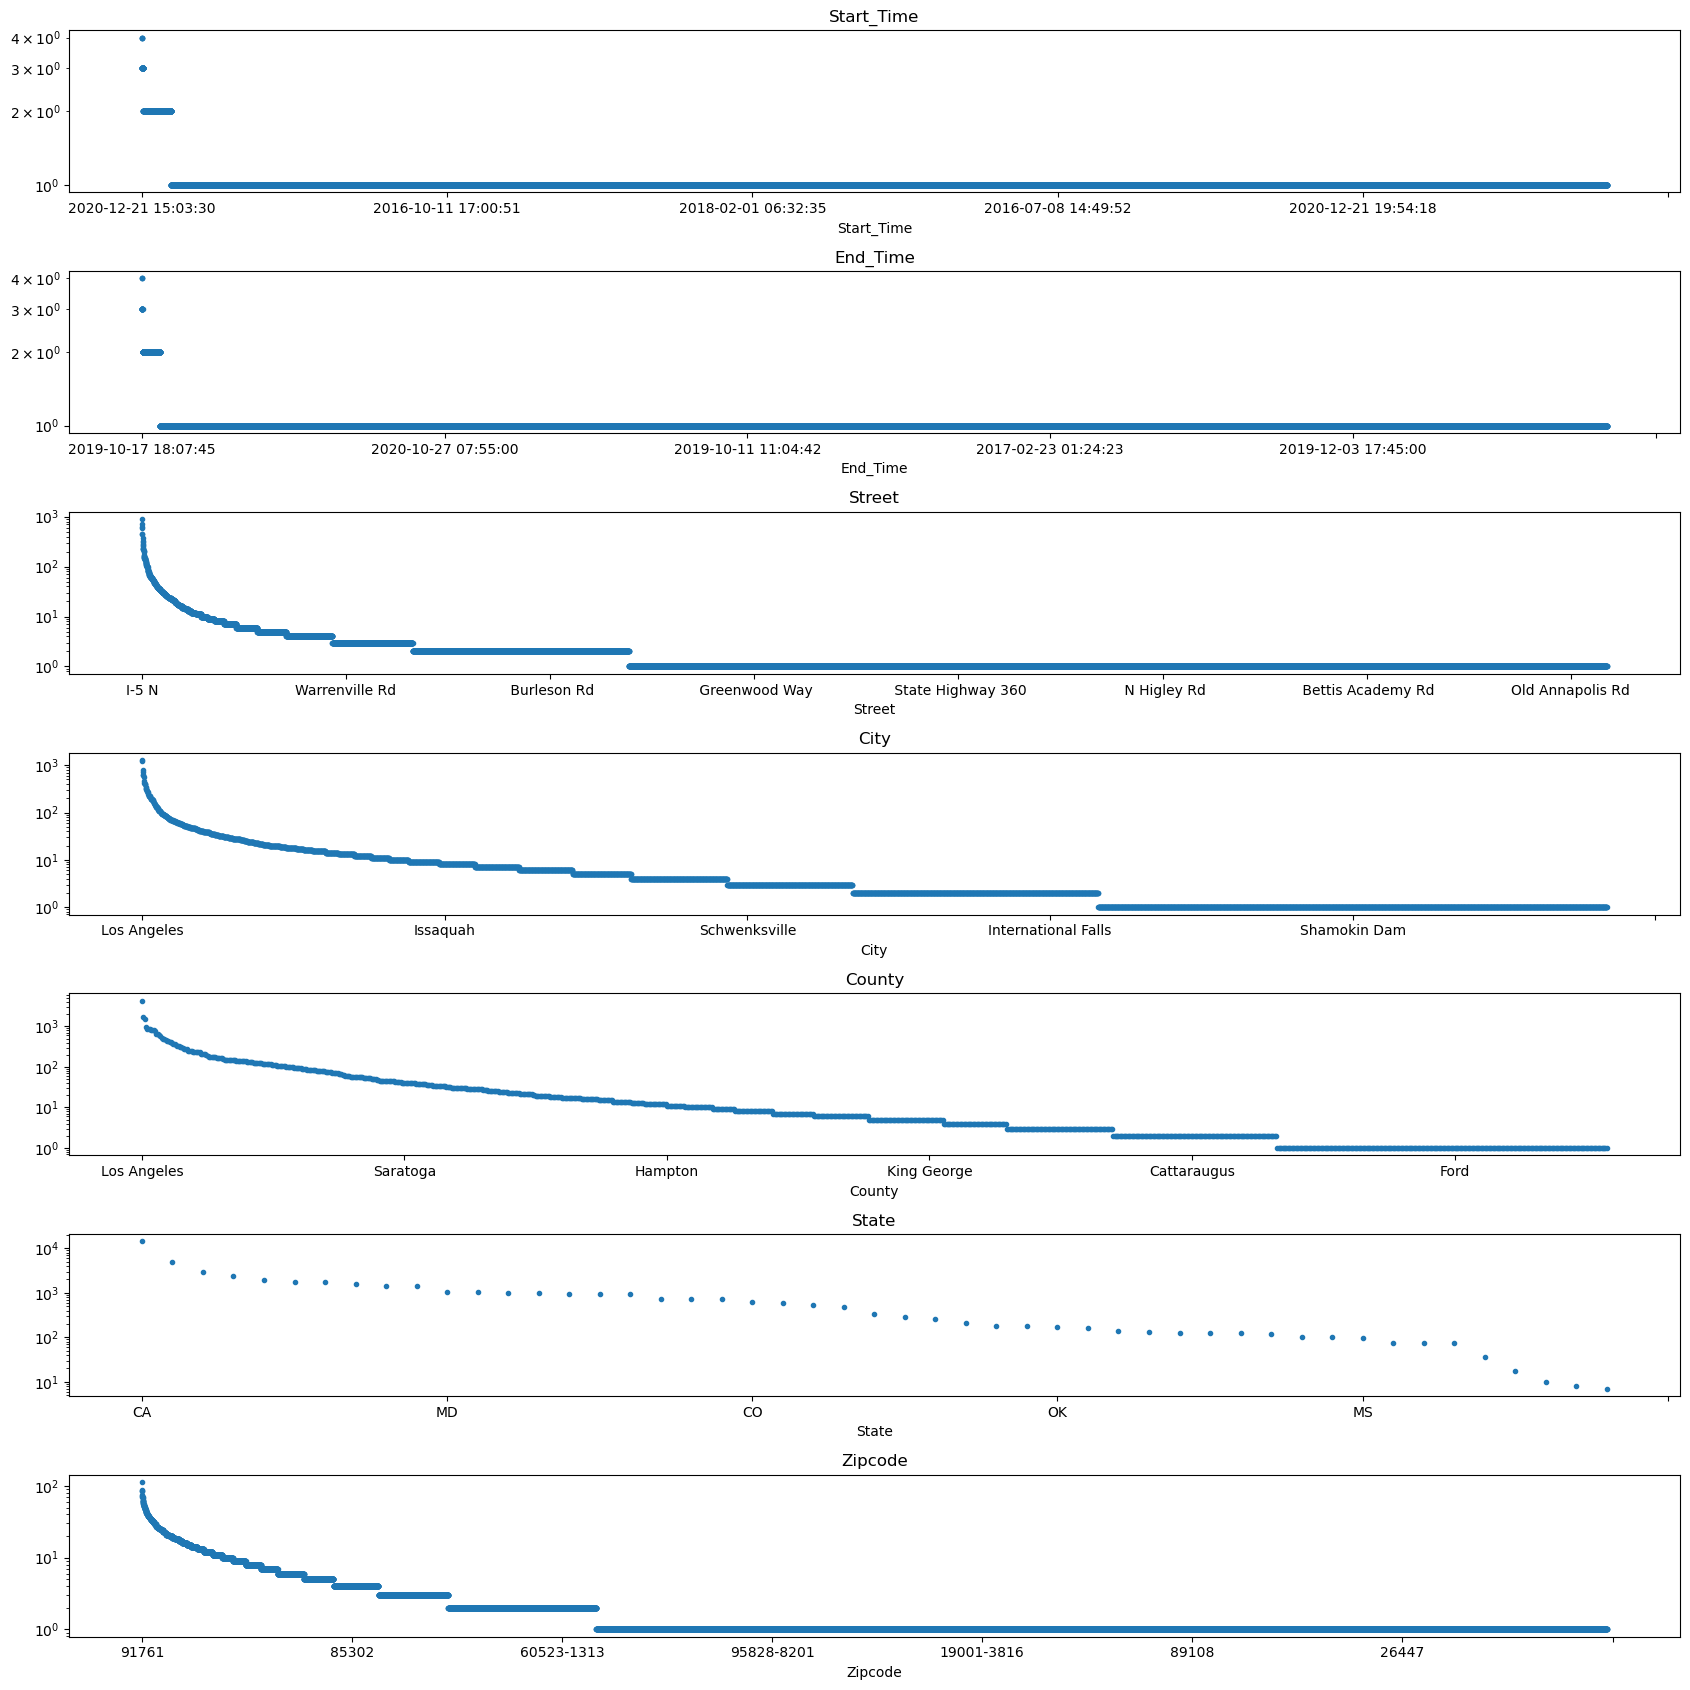

In [78]:
# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=7, figsize=(17, 17))

# Identify non-numerical features
dfNonNumerical = usaAccidentDf.select_dtypes(exclude=["number", "datetime"])

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(dfNonNumerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    dfNonNumerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout();

----------

<font color='darkviolet' size='5'>3. Content Investigation</font>
---
Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface.

------------

##### State
The column lists down the name of the US state found in the address of the accident. 
- Q: We want to see the top 10 states by the number of accidents.

In [79]:
usaAccidentDf.State

0        DC
1        CA
2        VA
3        UT
4        OR
         ..
48996    MN
48997    CA
48998    CA
48999    FL
49000    CA
Name: State, Length: 49001, dtype: object

Let’s look at the top ten states by the number of accidents. To do this, we need the absolute number of accidents against each state.

In [80]:
stateByAccident = usaAccidentDf.State.value_counts()
stateByAccident[:10]

State
CA    14376
FL     5032
OR     2882
TX     2418
NY     1970
MN     1755
NC     1723
VA     1578
IL     1415
PA     1389
Name: count, dtype: int64

Clearly, a significant number of accidents have happened in California, Florida, Texas, and New York. Next, we plot a horizontal bar chart for the top ten states

<Axes: ylabel='State'>

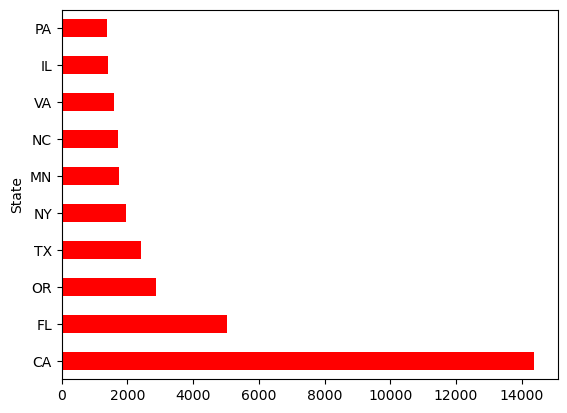

In [81]:
#barh: Make a horizontal bar plot.
stateByAccident[:10].plot(kind="barh", color='red')

##### City
The column lists the name of the city in the address record. 
- Q: Let us now check how many cities of the top ten states above feature in the top 30 cities by accidents.

In [82]:
sampleUsaAccident=usaAccidentDf.sample(50)
#pull out the column
sampleUsaAccident.City.head()  


35611          Charlotte
10009    Charlottesville
12423            Houston
45320    Ridgefield Park
9293          Southfield
Name: City, dtype: object

In [83]:
#look at the unique values of the column
sampleUsaAccident.City.unique()

array(['Charlotte', 'Charlottesville', 'Houston', 'Ridgefield Park',
       'Southfield', 'Bradenton', 'Royal City', 'Phoenix', 'Leawood',
       'Channahon', 'Osakis', 'Fort Worth', 'Brooklet', 'Portland',
       'San Leandro', 'Tempe', 'Denver', 'Corona', 'Calabasas',
       'Flushing', 'Merced', 'Valley Village', 'Frederick', 'El Dorado',
       'Castro Valley', 'Seaside', 'Richmond', 'Sacramento', 'Tacoma',
       'San Lorenzo', 'Cocoa', 'Asheboro', 'Camarillo', 'Miami',
       'New Market', 'Lake Elsinore', 'Lake Forest', 'Lansdale',
       'Wheatland', 'Henrico', 'Santaquin', 'Foster', 'Livermore',
       'Key West', 'Baton Rouge', 'Elgin', 'Delran', 'Martinez',
       'Tonkawa'], dtype=object)

In [84]:
usaAccidentDf['City'].is_unique

False

In [85]:
usaAccidentDf['City'].head()


0    Washington
1     Daly City
2        Dayton
3         Ogden
4        Madras
Name: City, dtype: object

In [86]:
usaAccidentDf['City'].tail()


48996     Saint Paul
48997        Oakdale
48998    Bloomington
48999        Orlando
49000         Phelan
Name: City, dtype: object

<Axes: ylabel='count'>

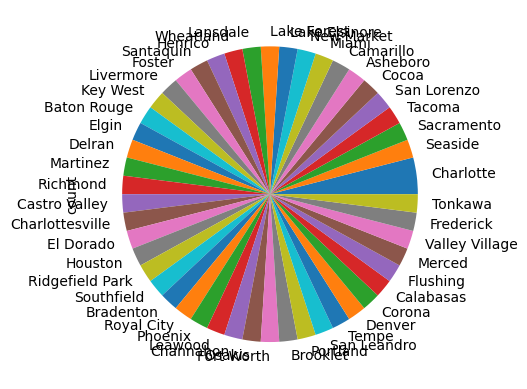

In [87]:
sampleUsaAccident['City'].value_counts().plot(kind='pie')

<font color='darkviolet' size='4'>3.1 Visualization </font>
- matplotlib
- Seaborn

<font color='darkviolet' size='5'>Importan message</font>

A proper and detailed EDA takes time! It is a very iterative process that often makes you go back to the start, after you addressed another flaw in the dataset. This is normal! It's the reason why we often say that 80% of any data science project is data preparation and EDA.

But keep also in mind that an in-depth EDA can consume a lot of time. And just because something seems interesting doesn't mean that you need to follow up on it. Always remind yourself what the dataset will be used for and tailor your investigations to support that goal. And sometimes it is also ok, to just do a quick-and-dirty data preparation and exploration. So that you can move on to the data modeling part rather quickly, and to establish a few preliminary baseline models perform some informative results investigation.

### References

https://github.com/sherbold/intro-to-data-science
https://github.com/miykael/miykael.github.io/blob/master/assets/nb/03_advanced_eda/nb_advanced_eda.ipynb